In [1]:
from glob import glob
import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
import scipy as sp
import seaborn as sns
import matplotlib as mpl

## Read in the data
first starting with the parameters files

In [2]:
run_dirs = sorted(glob('runs/nvt-fixed-temp/si-*'))
run_dirs

['runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-01bd9480',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-10ce8f31',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-2bcd06d4',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-382ae57a',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-39c7c71d',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-526f7ee4',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-6456c0b8',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-89979534',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-8e988302',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-97d501be',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-9fb85a0f',
 'runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-a81cf9bb',
 'runs/nvt-fixed-temp/si-vac

In [3]:
params = []
for d in run_dirs:
    print(d)
    try:
        params.append(json.loads((Path(d)/'params.json').read_text()))
    except: 
        print(f'couldnt find {d}/params.json; skipping')
        continue
    params[-1]['dir'] = d
    params[-1]['hash'] = d.split('-')[-1]
params = pd.DataFrame(params)
params.head()
#params = params[params['steps'] == 20_000]

runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-01bd9480
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-10ce8f31
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-2bcd06d4
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-382ae57a
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-39c7c71d
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-526f7ee4
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-6456c0b8
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-89979534
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-8e988302
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-97d501be
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-9fb85a0f
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-a81cf9bb
runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573.0-method=lda-blend=0-b5e442bd

,file,starting_strc,temperature,timestep,calculator,ensemble,temp_tau,stress_tau,steps,seed,...,target_error,error_history,retrain_freq,min_target_frac,n_blending_steps,cascade_commit,my_commit,start_time,dir,hash
0,None,../0_setup/initial-geometries/si-vacancy-2x2x2...,1573.0,1,lda,nvt,25,25.0,40000,8,...,0.9,8,40010,1.0,0,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,2024-10-04T13:59:03.031129,runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573...,01bd9480
1,None,../0_setup/initial-geometries/si-vacancy-2x2x2...,1573.0,1,lda,nvt,25,25.0,40000,4,...,0.9,8,512,0.1,0,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,2024-10-02T15:29:03.948930,runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573...,10ce8f31
2,None,../0_setup/initial-geometries/si-vacancy-2x2x2...,1573.0,1,lda,nvt,25,25.0,40000,1,...,0.9,8,512,0.1,0,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,2024-10-02T15:29:03.963278,runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573...,2bcd06d4
3,None,../0_setup/initial-geometries/si-vacancy-2x2x2...,1573.0,1,lda,nvt,25,25.0,40000,3,...,0.9,8,512,0.1,0,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,2024-10-02T15:29:03.951355,runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573...,382ae57a
4,None,../0_setup/initial-geometries/si-vacancy-2x2x2...,1573.0,1,lda,nvt,25,25.0,40000,8,...,0.9,8,512,0.1,0,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,5fda70cf55730fb117bf65924cfd5fae9fd3b0ed,2024-10-03T23:43:57.267183,runs/nvt-fixed-temp/si-vacancy-2x2x2-temp=1573...,39c7c71d


Then read in the diffusion coefficient we saved to disk

In [4]:
params[['target_error', 'retrain_freq', 'min_target_frac', 'n_blending_steps']].value_counts()

target_error  retrain_freq  min_target_frac  n_blending_steps
0.9           512           0.1              0                   10
                                             10                  10
              40010         1.0              0                   10
Name: count, dtype: int64

Compute inverse temperature and split out the DFT baselines

In [5]:
param_vars = ['min_target_frac', 'n_blending_steps']

In [6]:
data = []
hashes = []
for i, row in params.iterrows(): 
    # read in the results for each set of parameters
    run = row['dir']
    try:
        _data = pd.read_json(Path(run)/'proxima-log.json', lines=True)
    except: 
        print('couldnt read proximal log for', run)
        hashes.append(None)
        continue
    # make sure to have timestep
    _data.reset_index(names='timestep', inplace=True)

    # keep the hash of the run
    _hash = run.split('-')[-1]
    hashes.append(_hash)
    _data['hash'] = _hash 
    #traj = read(Path(run)/'md.traj', index=':')
    #break    
    # add the parameters to the experiment df for easy plotting, grouping, etc
    for var in param_vars:
        _data[var] = row[var]
    data.append(_data)

# track the hashes as well for param lookup
params['hash'] = hashes
data = pd.concat(data)

In [7]:
data.head()

,timestep,step_time,energy,maximum_force,stress,temperature,volume,used_surrogate,proxima_alpha,proxima_threshold,proxima_blending_step,proxima_lambda_target,last_uncer,last_error,total_invocations,target_invocations,model_version,hash,min_target_frac,n_blending_steps
0,0,4.483736,-6685.076047,0.302794,"[0.009561754695292001, 0.009561754695161, 0.00...",1896.508666,1376,False,NaN,NaN,0,NaN,0.007326,0.309682,1,1,0,01bd9480,1.0,0
1,1,4.274350,-6684.985718,0.725431,"[0.009353269118824, 0.009597599432059001, 0.00...",1883.760385,1376,False,NaN,NaN,0,NaN,0.008507,0.732926,2,2,0,01bd9480,1.0,0
2,2,5.346784,-6684.715457,1.465673,"[0.008930290744856, 0.009456781824471001, 0.00...",1834.832897,1376,False,NaN,NaN,0,NaN,0.009332,1.474700,3,3,0,01bd9480,1.0,0
3,3,5.156131,-6684.285421,2.264897,"[0.008320663240306002, 0.009151765014024, 0.00...",1679.279711,1376,False,NaN,NaN,0,NaN,0.009794,2.274572,4,4,0,01bd9480,1.0,0
4,4,5.686496,-6683.687329,3.138854,"[0.007512230849835001, 0.008677303064514, 0.00...",1675.853939,1376,False,NaN,NaN,0,NaN,0.011971,3.148256,5,5,0,01bd9480,1.0,0


In [8]:
data['pressure'] = data['stress'].map(lambda l: sum(l[:3]) / 3)

In [9]:
data.groupby(param_vars)['used_surrogate'].mean()

min_target_frac  n_blending_steps
0.1              0                   0.558621
                 10                  0.784843
1.0              0                   0.000000
Name: used_surrogate, dtype: float64

In [10]:
from tqdm.auto import tqdm

/home/mike/miniconda3/envs/cascade/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
full_surrogate = []
for i, row in tqdm(data.iterrows(), total = data.shape[0]):
    if row['n_blending_steps'] < 10: 
        full_surrogate.append(row['used_surrogate'])
    else:
        full_surrogate.append(row['proxima_lambda_target'] == 0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200030/1200030 [00:23<00:00, 50130.14it/s]


In [12]:
data['full_surrogate'] = full_surrogate

In [13]:
data.groupby(param_vars)['full_surrogate'].mean()

min_target_frac  n_blending_steps
0.1              0                   0.558621
                 10                  0.740576
1.0              0                   0.000000
Name: full_surrogate, dtype: float64

## Read in diffusion coeffs

In [14]:
msds = []
for i, row in params.iterrows():
    msd = np.load(Path(row['dir']) / 'msd-com=1.npz')['msd']
    msds.append(msd)
msd_df = params.copy()
msd_df['msd'] = msds

In [15]:
param_vars

['min_target_frac', 'n_blending_steps']

## zoom in ones

no blend: hash = 382ae57a  
DFT only: hash = d8af6f3e  
blend:    hash = 3edef378  

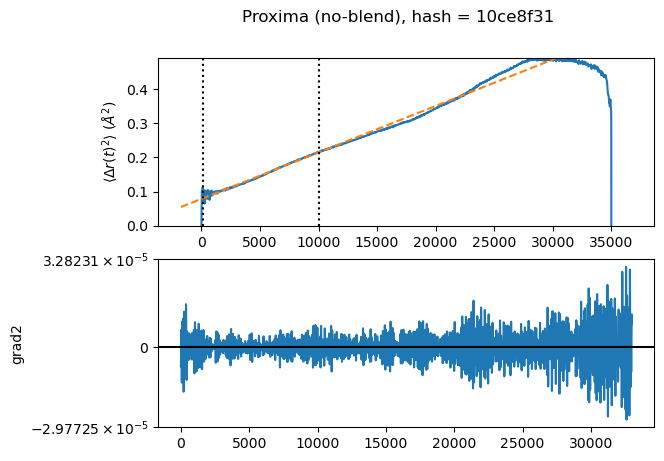

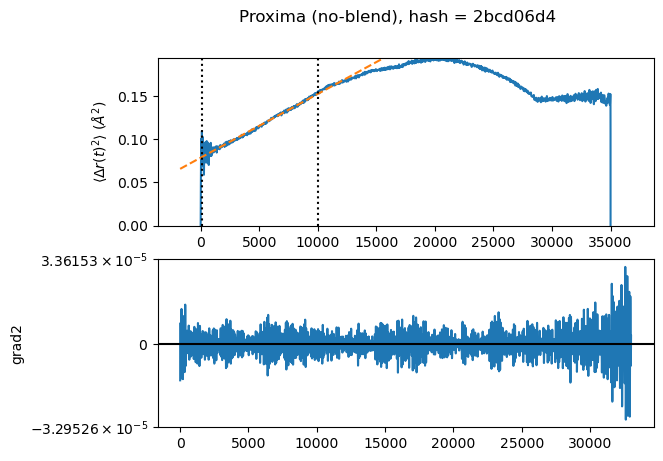

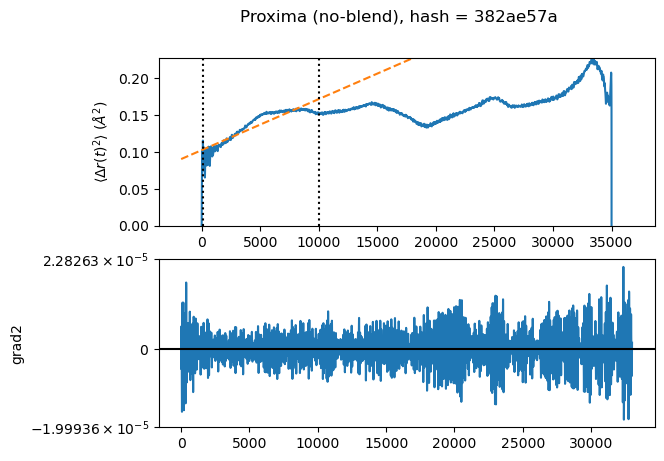

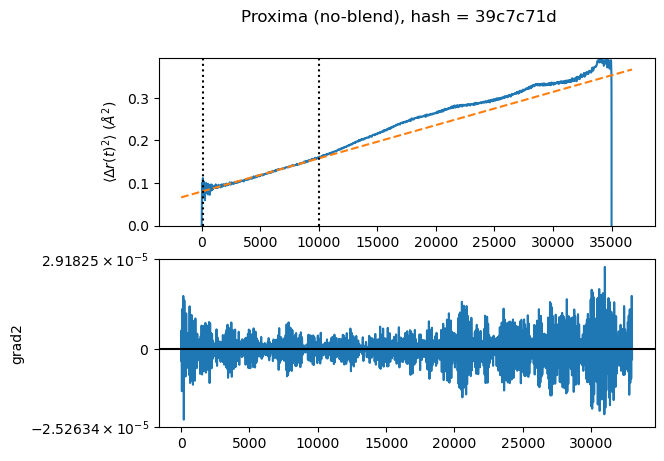

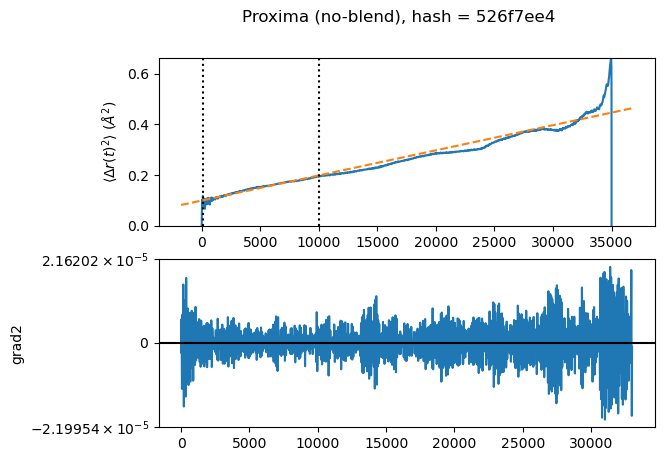

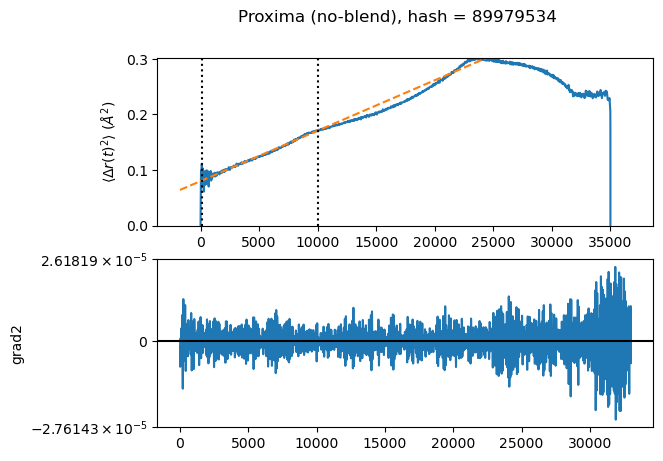

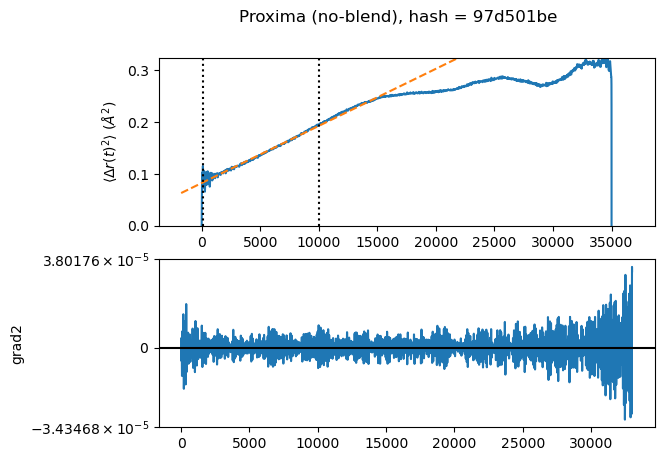

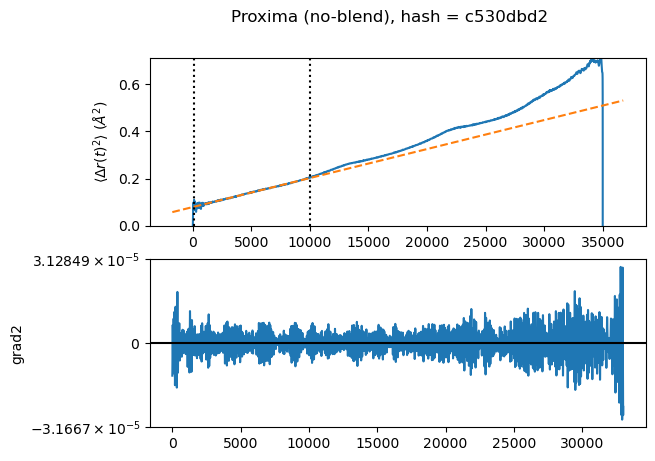

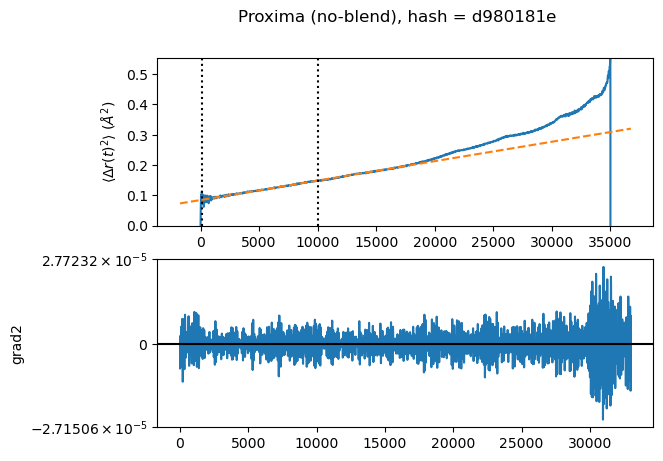

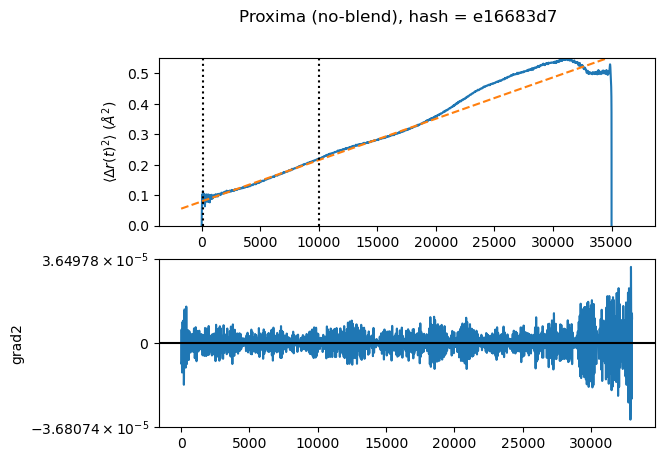

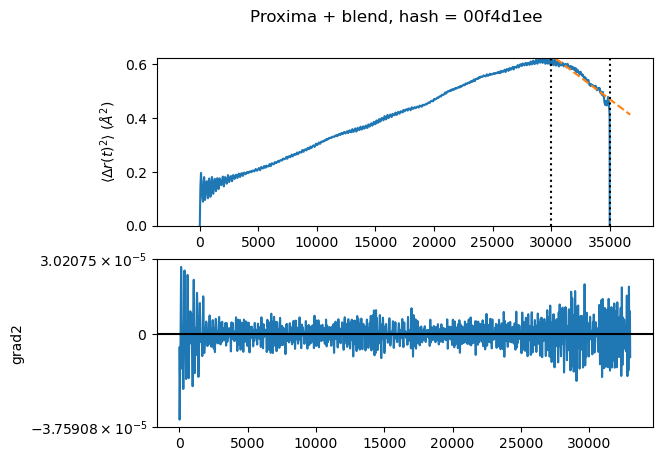

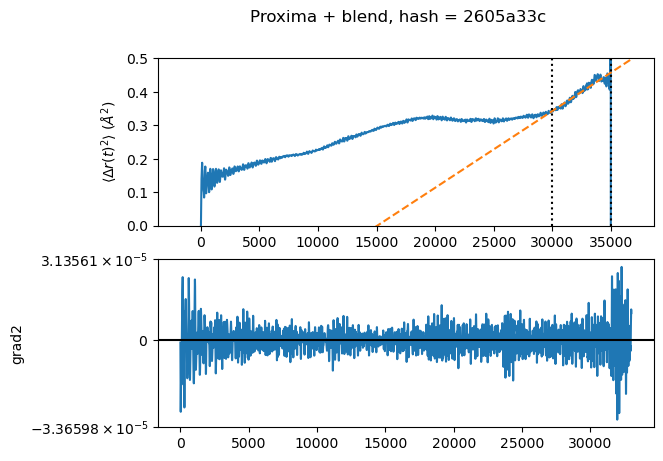

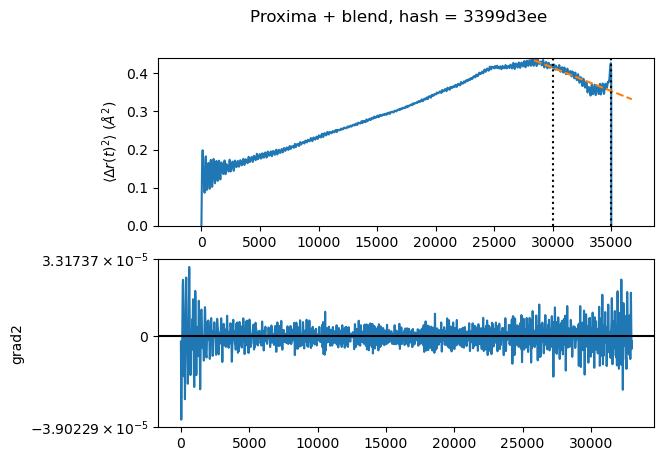

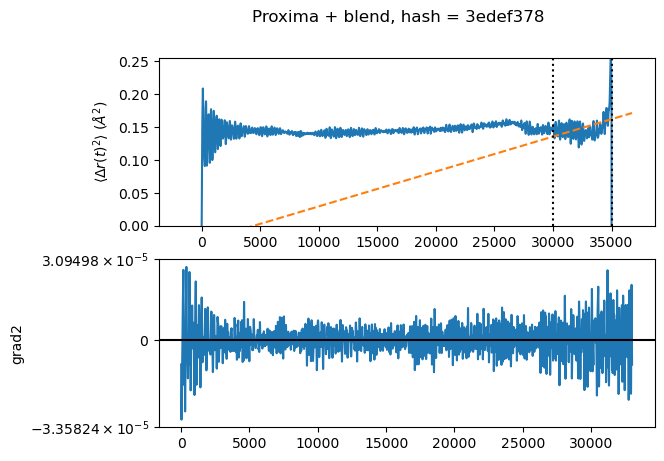

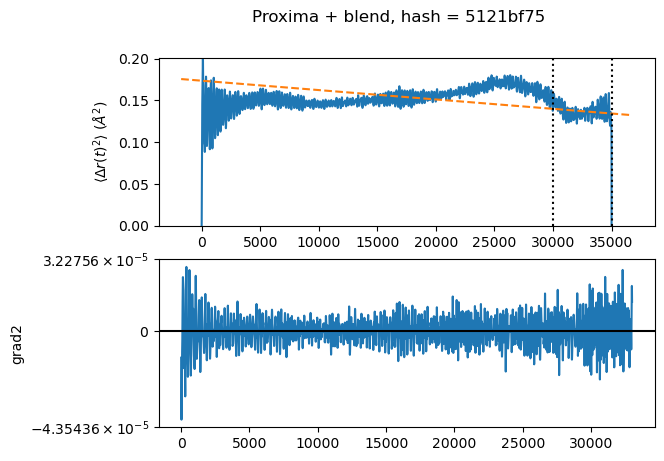

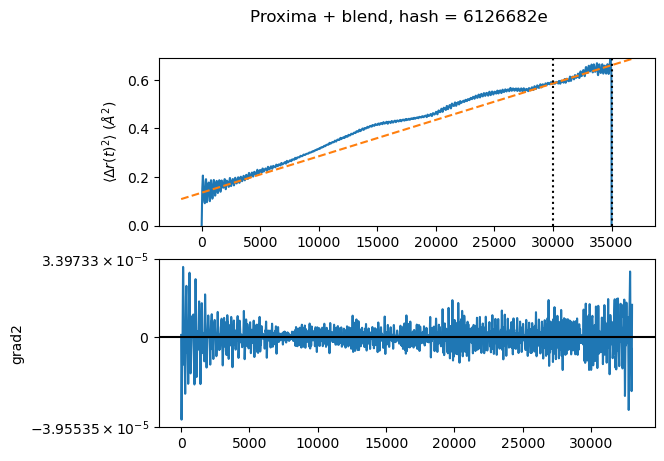

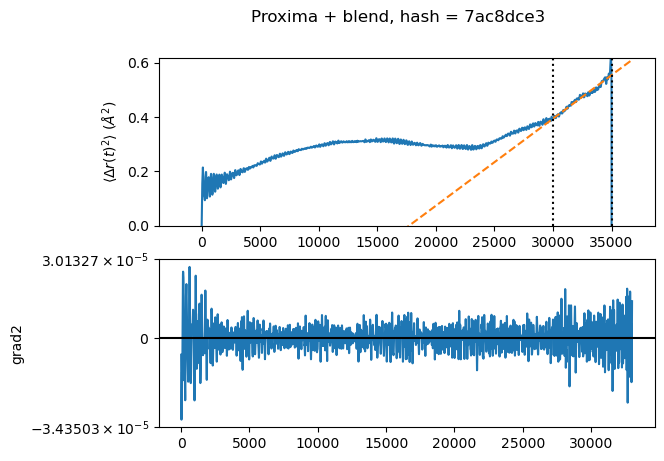

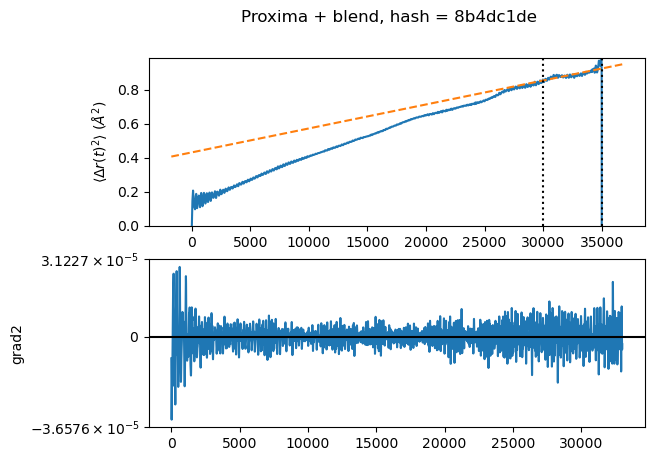

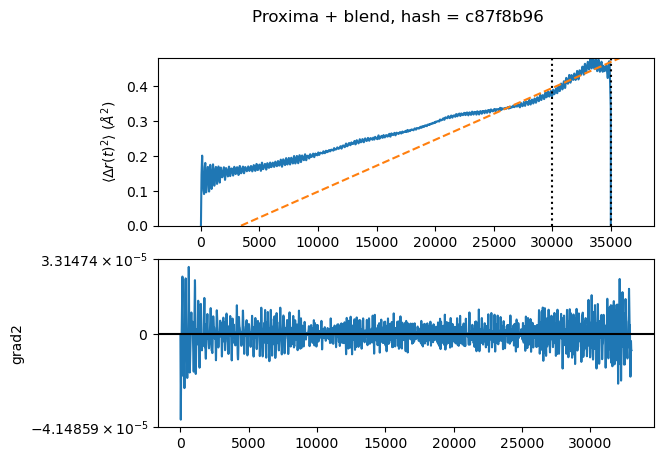

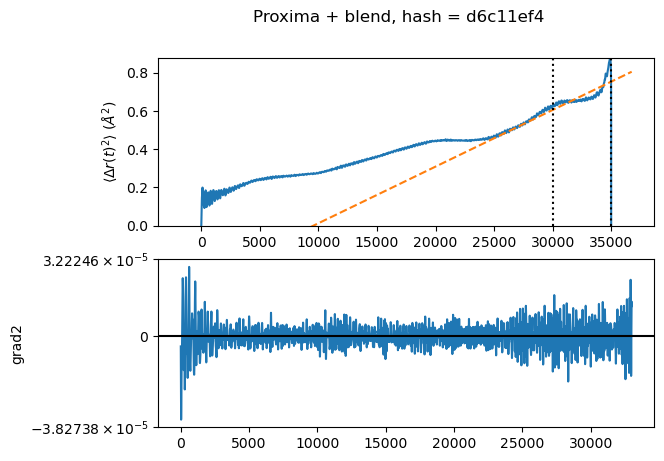

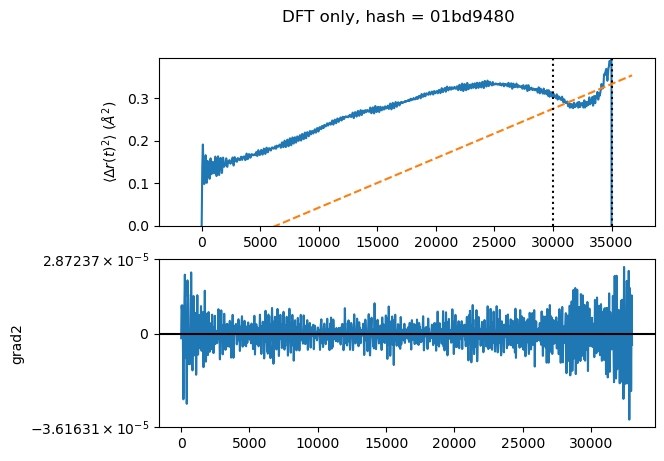

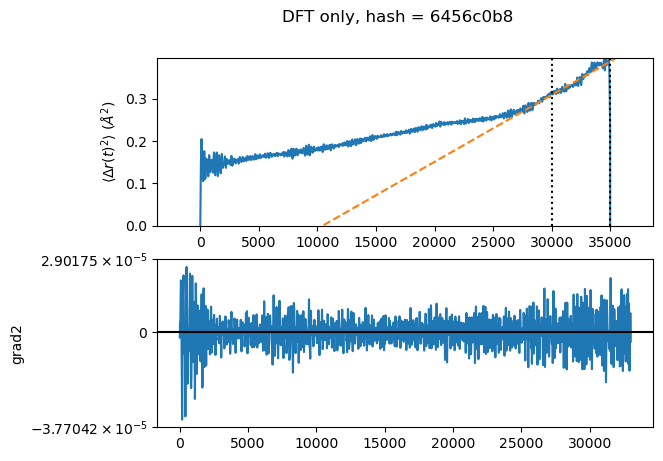

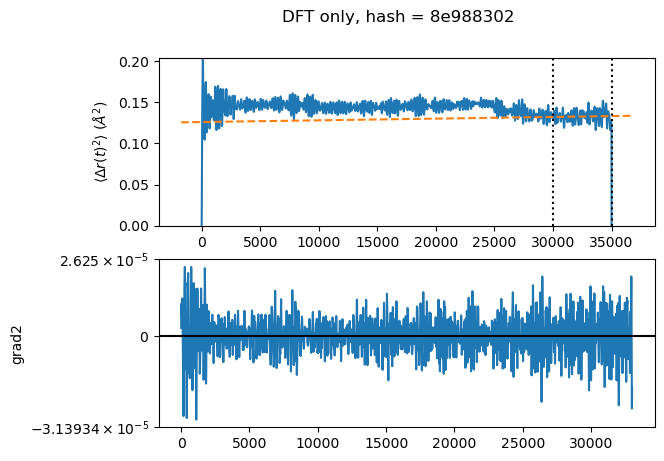

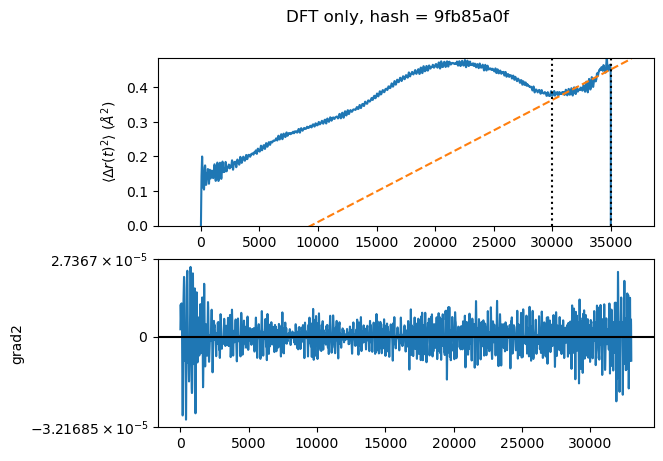

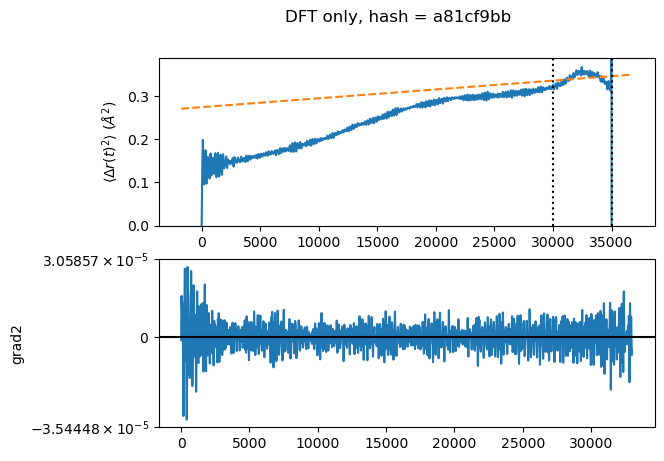

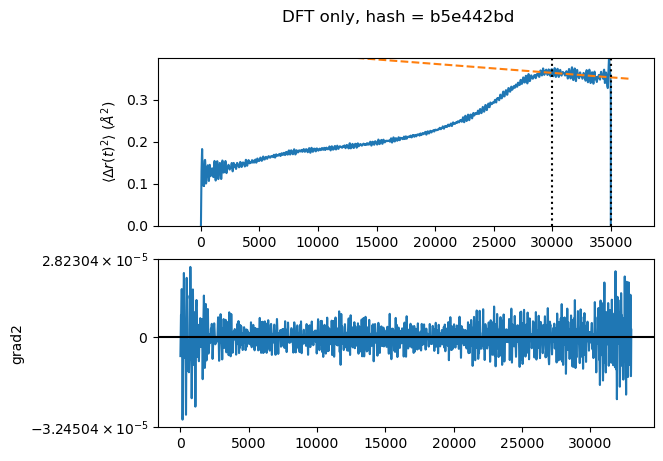

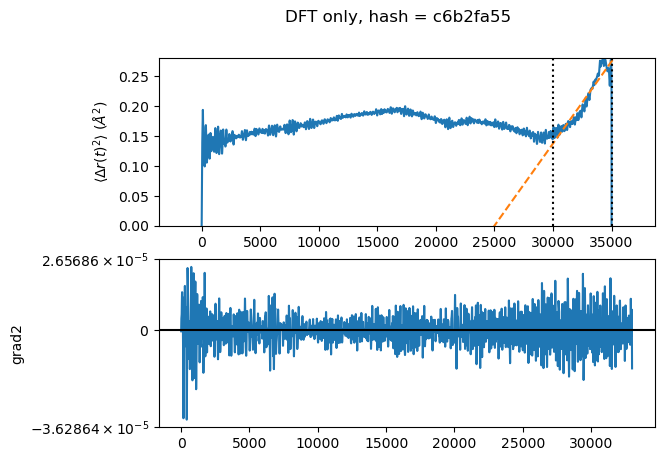

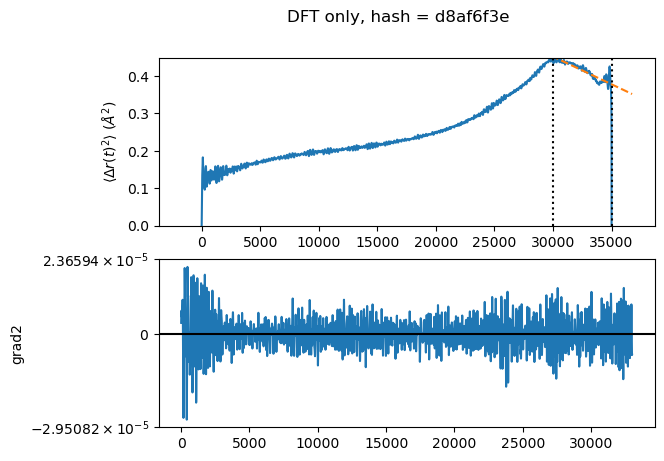

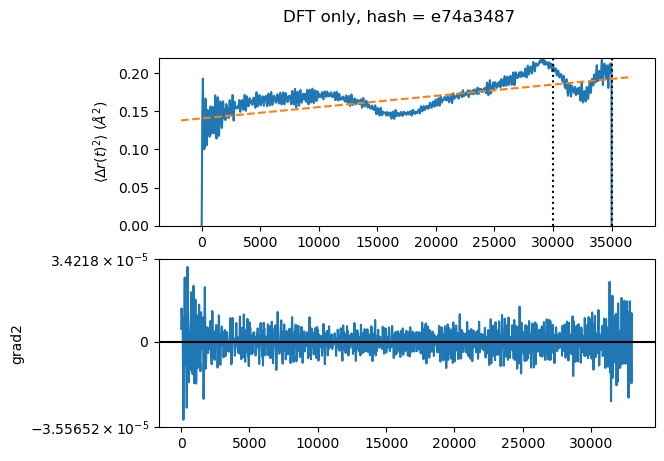

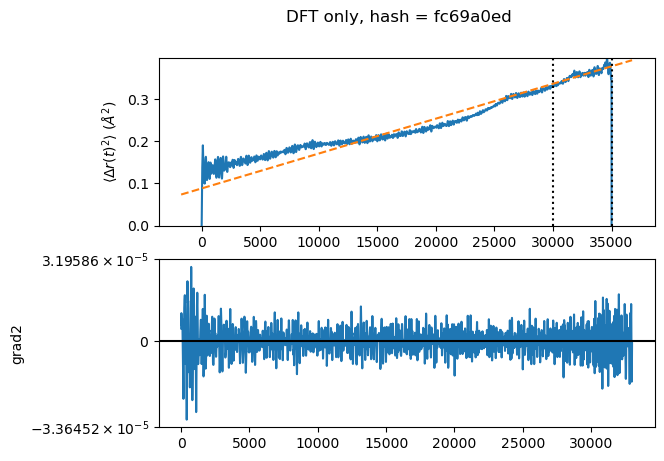

In [16]:
_msd_df = []
for i, g in msd_df.groupby(param_vars):
    for j, row in g.iterrows():
        fig, ax = plt.subplots(2)
        ax[0].plot(row['msd'])
        ax[0].set_ylabel(r'$\langle \Delta r(t)^2 \rangle$ ($\AA^2$)')
        ax[1].plot(np.diff(row['msd'][1000:-1000], 2))
        ax[1].set_ylabel('grad2')
        ax[1].axhline(0, color='k')
        ax[1].set_yscale('symlog')
        title = ''
        frac, blend = i
        if frac == 1:
            title += 'DFT only'
        elif blend == 0:
            title += 'Proxima (no-blend)'
        else: 
            title += 'Proxima + blend'

        title += f', hash = {row["hash"]}'
        plt.suptitle(title)
        
        no_blend = (frac < 1) and blend == 0
        fit_l, fit_r = (100, 10_000) if no_blend else (30_000, 35_000)
        t = np.arange(row['msd'].shape[0])
        m, b = np.polyfit(t[fit_l:fit_r], row['msd'][fit_l:fit_r], 1)
        d = m/6
        #d_list.append(d)
        x = np.array(ax[0].get_xlim())
        y = b + m * x
        ax[0].plot(x, y, '--')
        ax[0].axvline(fit_l, color='k', linestyle='dotted')
        ax[0].axvline(fit_r, color='k', linestyle='dotted')
        ax[0].set_ylim(row['msd'].min(), row['msd'].max())
        row['d'] = d
        _msd_df.append(row)
        plt.show()
msd_df = pd.DataFrame(_msd_df)

In [17]:
condition = []
for i, row in msd_df.iterrows(): 
    if row['min_target_frac'] == 1.:
        condition.append('DFT-only')
    elif row['n_blending_steps'] == 0.: 
        condition.append('Proxima')
    else: 
        condition.append('Proxima + blend')
msd_df['condition'] = condition

In [18]:
msd_df['method'] = pd.Categorical(msd_df['condition'])

In [19]:
rc = {'axes.titlesize':12, 
      'axes.labelsize':14, 
      'xtick.labelsize': 14, 
      'ytick.labelsize': 12, 
      'legend.fontsize': 12}

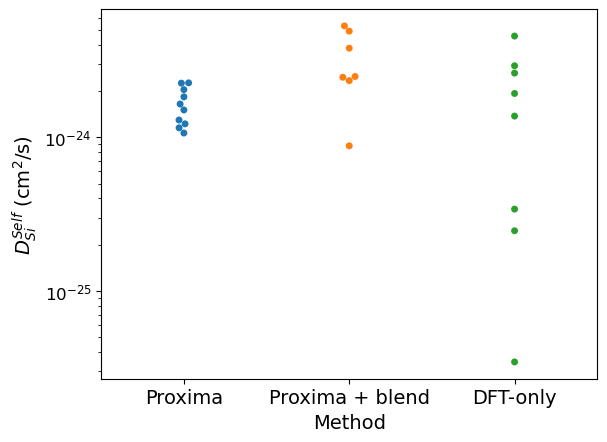

In [25]:
with mpl.rc_context(rc=rc):
    msd_df['d_cm2'] = msd_df['d']/1e18
    sns.swarmplot(y='d_cm2', 
                data=msd_df, 
                hue='condition', 
                x='condition')
    plt.yscale('log')
    plt.ylabel(r'$D^{Self}_{Si}$ ($\mathrm{cm}^2/\mathrm{s}$)')
    plt.xlabel('Method')
plt.savefig('nvt_D.png', bbox_inches='tight', dpi=500)
#plt.grid(True, which='both')

In [21]:
msd_df.shape

(30, 37)

In [22]:
keep_hashes = '382ae57a', '3edef378', 'd8af6f3e'
methods = 'Proxima', 'Proxima + blend', 'DFT (reference)'

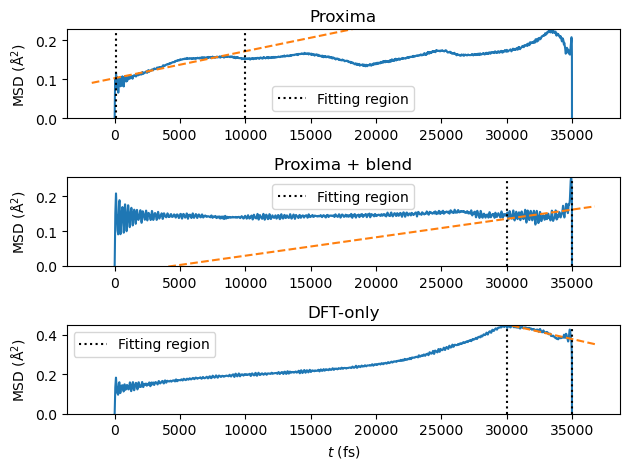

In [23]:
fig, axs = plt.subplots(3)
for i in range(3):
    ax = axs[i]
    h = keep_hashes[i]
    row = msd_df.query(f'hash == "{h}"').iloc[0]
    ax.plot(row['msd'])
    #ax.set_ylabel(r'$\langle \Delta r(t)^2 \rangle$ ($\AA^2$)')   
    ax.set_ylabel('MSD ($\mathrm{\AA}^2$)')
    no_blend = methods[i] == 'Proxima'
    fit_l, fit_r = (100, 10_000) if no_blend else (30_000, 35_000)
    t = np.arange(row['msd'].shape[0])
    m, b = np.polyfit(t[fit_l:fit_r], row['msd'][fit_l:fit_r], 1)
    d = m/6
    x = np.array(ax.get_xlim())
    y = b + m * x
    ax.plot(x, y, '--')
    ax.axvline(fit_l, color='k', linestyle='dotted', label='Fitting region')
    ax.axvline(fit_r, color='k', linestyle='dotted')
    ax.set_ylim(row['msd'].min(), row['msd'].max())
    ax.legend()
    ax.set_title(row['method'])
plt.xlabel('$t$ (fs)')
plt.tight_layout()
plt.savefig('MSD.png', dpi=500, bbox_inches='tight')